In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('../../../../')
print(os.getcwd())
from v2.strategy.indicators.optimal_v2 import Optimal_v2
from v2.model import Trading
from v2.strategy.indicators.param import Param
from v2.strategy.indicators.roc import RateOfChange
from v2.research.scripts.notebook_utils import notebookUtils
from sklearn.model_selection import train_test_split

#tensorflow stuff
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

/Users/rosscopeland/Desktop/personal/code/vivaldi/back_testing


In [7]:
nu = notebookUtils()
model_name = "simple_nn_test"

In [12]:
dataset, features, indicators = nu.loadData(indicators=[('rsi', 'close', ''), ('optimal_v2', 'close', '')],
                            param_spec={},
                            optimal_threshold={'buy':(0.005,0.05)},
                            spans=[{'indicator_name':'willr',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'cci',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'rsi',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'roc',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'RSI',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'roc',
                                    'column_name': 'RSI',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'cmo',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [2,3,5,10,60]}
                                    ],

                            scale='minmaxwindow')
        
    # create one minute, five minute, ten minute, and twenty minute slopes for macd, rsi
dataset

Loading data from EOS...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from chunk 2...
Loading data from chunk 3...
Loading data from BAT...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from ETC...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from chunk 2...
Loading data from chunk 3...
Loading data from ATOM...
Loading data from chunk 0...
Loading data from ZEC...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from OMG...
Loading data from chunk 0...
Loading data from LINK...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from chunk 2...
Loading data from BNB...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from chunk 2...
Loading data from chunk 3...
Loading data from chunk 4...
Loading data from MATIC...
Loading data from chunk 0...
Loading data from ONT...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from chu

,time,high,low,close,open,volume,RSI,optimal,WILLR_close_period_3,WILLR_close_period_5,...,Momentum_RSI_period_30,RateOfChange_RSI_period_3,RateOfChange_RSI_period_5,RateOfChange_RSI_period_10,RateOfChange_RSI_period_30,CMO_close_period_2,CMO_close_period_3,CMO_close_period_5,CMO_close_period_10,CMO_close_period_60
15089,1531596899999,6.9540,6.9323,6.943544,6.9540,8710.50,0.534669,0.0,0.342651,0.209832,...,0.684141,0.387225,0.459056,0.420397,0.481044,0.311802,0.446512,0.604588,0.692738,0.548649
15090,1531596959999,6.9346,6.9282,6.936172,6.9316,6890.24,0.520514,1.0,0.327926,0.124697,...,0.682588,0.364205,0.458860,0.395093,0.481592,0.129137,0.250749,0.437443,0.595758,0.529850
15091,1531597019999,6.9442,6.9285,6.937486,6.9285,7438.55,0.538354,0.0,0.332682,0.145831,...,0.710455,0.371392,0.467693,0.423367,0.502835,0.279602,0.329374,0.470193,0.606909,0.532987
15092,1531597079999,6.9456,6.9373,6.939193,6.9456,7855.63,0.542072,0.0,0.353024,0.173285,...,0.696514,0.418719,0.466786,0.404144,0.490361,0.502790,0.443226,0.515977,0.621994,0.537084
15093,1531597139999,6.9422,6.9360,6.940696,6.9402,2172.38,0.544397,0.0,0.359119,0.206034,...,0.746227,0.440057,0.455392,0.434430,0.533898,0.678337,0.545233,0.558060,0.635712,0.540711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11372817,1565834399999,1.0531,1.0531,1.053125,1.0531,0.00,0.695851,0.0,0.501035,0.483683,...,0.392163,0.255038,0.262682,0.287525,0.230728,0.373441,0.396005,0.505801,0.596642,0.703385
11372818,1565863259999,1.0459,1.0414,1.047263,1.0459,54.33,0.611707,0.0,0.476470,0.446927,...,0.414617,0.200054,0.208907,0.211197,0.235810,0.010676,0.041741,0.149409,0.361468,0.634382
11372819,1565863319999,1.0422,1.0386,1.044731,1.0406,400.53,0.616436,0.0,0.471735,0.452768,...,0.372380,0.204924,0.219121,0.232190,0.218921,0.005806,0.026428,0.108243,0.303667,0.606868
11372820,1565863379999,1.0410,1.0410,1.042866,1.0410,97.50,0.608307,0.0,0.481509,0.428919,...,0.361361,0.200099,0.209794,0.237701,0.214181,0.003471,0.018803,0.086328,0.268385,0.587237


In [13]:
edit_dataset = dataset.drop(["time", "open", "high", "low", "volume"], axis=1)
edit_dataset.dropna(inplace=True)
edit_dataset

,close,RSI,optimal,WILLR_close_period_3,WILLR_close_period_5,WILLR_close_period_10,WILLR_close_period_30,CCI_close_period_3,CCI_close_period_5,CCI_close_period_10,...,Momentum_RSI_period_30,RateOfChange_RSI_period_3,RateOfChange_RSI_period_5,RateOfChange_RSI_period_10,RateOfChange_RSI_period_30,CMO_close_period_2,CMO_close_period_3,CMO_close_period_5,CMO_close_period_10,CMO_close_period_60
15089,6.943544,0.534669,0.0,0.342651,0.209832,0.543251,0.790988,8.971415e-02,3.105711e-01,0.483328,...,0.684141,0.387225,0.459056,0.420397,0.481044,0.311802,0.446512,0.604588,0.692738,0.548649
15090,6.936172,0.520514,1.0,0.327926,0.124697,0.402217,0.726308,1.952273e-11,3.955785e-02,0.300860,...,0.682588,0.364205,0.458860,0.395093,0.481592,0.129137,0.250749,0.437443,0.595758,0.529850
15091,6.937486,0.538354,0.0,0.332682,0.145831,0.427357,0.737838,4.164488e-01,3.134462e-01,0.376978,...,0.710455,0.371392,0.467693,0.423367,0.502835,0.279602,0.329374,0.470193,0.606909,0.532987
15092,6.939193,0.542072,0.0,0.353024,0.173285,0.498600,0.752815,1.000000e+00,4.841938e-01,0.464941,...,0.696514,0.418719,0.466786,0.404144,0.490361,0.502790,0.443226,0.515977,0.621994,0.537084
15093,6.940696,0.544397,0.0,0.359119,0.206034,0.657899,0.766007,6.337230e-01,5.634525e-01,0.457092,...,0.746227,0.440057,0.455392,0.434430,0.533898,0.678337,0.545233,0.558060,0.635712,0.540711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11372817,1.053125,0.695851,0.0,0.501035,0.483683,0.316239,0.473062,7.970056e-01,5.031689e-01,0.426943,...,0.392163,0.255038,0.262682,0.287525,0.230728,0.373441,0.396005,0.505801,0.596642,0.703385
11372818,1.047263,0.611707,0.0,0.476470,0.446927,0.279922,0.290791,9.036967e-12,3.923816e-12,0.133572,...,0.414617,0.200054,0.208907,0.211197,0.235810,0.010676,0.041741,0.149409,0.361468,0.634382
11372819,1.044731,0.616436,0.0,0.471735,0.452768,0.275268,0.241391,1.343257e-01,1.822675e-01,0.204514,...,0.372380,0.204924,0.219121,0.232190,0.218921,0.005806,0.026428,0.108243,0.303667,0.606868
11372820,1.042866,0.608307,0.0,0.481509,0.428919,0.256611,0.167940,2.233424e-01,2.865557e-01,0.306898,...,0.361361,0.200099,0.209794,0.237701,0.214181,0.003471,0.018803,0.086328,0.268385,0.587237


In [14]:
trainX, testX, trainy, testy = nu.splitData(edit_dataset, split_size=0.2, y_column_name="optimal", shuffle_data=False, balance_unbalanced_data=True, balance_info={'multiplier_val':4, 'superset_class_val':0, 'randomize_concat':True})
trainX

,close,RSI,WILLR_close_period_3,WILLR_close_period_5,WILLR_close_period_10,WILLR_close_period_30,CCI_close_period_3,CCI_close_period_5,CCI_close_period_10,CCI_close_period_30,...,Momentum_RSI_period_30,RateOfChange_RSI_period_3,RateOfChange_RSI_period_5,RateOfChange_RSI_period_10,RateOfChange_RSI_period_30,CMO_close_period_2,CMO_close_period_3,CMO_close_period_5,CMO_close_period_10,CMO_close_period_60
0,228.538107,0.515577,0.479720,0.516501,0.683289,0.561489,1.000000,1.000000,0.822003,0.551362,...,0.475187,0.543416,0.548117,0.533300,0.334434,0.981352,0.912522,0.749563,0.585340,0.510338
1,0.959287,0.644254,0.611325,0.594934,0.933748,0.996036,0.900000,0.692970,0.677479,0.442447,...,0.658639,0.401951,0.400017,0.421654,0.369906,0.999005,0.980307,0.925262,0.840036,0.628089
2,0.623709,0.475642,0.506986,0.365930,0.244875,0.647281,0.147824,0.197028,0.310628,0.431313,...,0.610533,0.359685,0.343752,0.425146,0.447898,0.079756,0.178469,0.310347,0.453862,0.424449
3,11327.185742,0.519081,0.611352,0.664463,0.782285,0.921023,1.000000,0.920075,0.790659,0.662361,...,0.671750,0.467323,0.460239,0.629382,0.571704,0.975930,0.944253,0.899406,0.787174,0.508000
4,13.787533,0.332014,0.566913,0.329412,0.139042,0.198388,0.090331,0.167783,0.349990,0.466318,...,0.400276,0.362637,0.379791,0.350211,0.308833,0.016726,0.072588,0.188407,0.275225,0.360945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538925,6107.643027,0.556395,0.322204,0.413133,0.276887,0.379302,0.309752,0.281617,0.349924,0.520486,...,0.557270,0.368483,0.351626,0.313398,0.351410,0.039650,0.112788,0.271410,0.438945,0.524746
538926,0.260084,0.554786,0.460593,0.297531,0.230521,0.383625,0.671468,0.703473,0.569116,0.656716,...,0.496512,0.526457,0.442872,0.442673,0.365392,0.281006,0.345639,0.402105,0.481824,0.538550
538927,0.004861,0.336148,0.441406,0.436121,0.145958,0.142267,1.000000,0.437305,0.391538,0.487839,...,0.289120,0.506297,0.432224,0.312083,0.199665,0.005970,0.053116,0.167190,0.292388,0.338886
538928,0.290025,0.743824,0.492173,0.506327,0.606377,0.847268,1.000000,0.905867,0.684012,0.641698,...,0.705793,0.392955,0.357065,0.354041,0.353724,0.821703,0.744205,0.692771,0.658316,0.672367


In [15]:
class_weights = nu.getWeights(trainy)
class_weights

{0: 0.625, 1: 2.5}

In [16]:
#neural network
model = Sequential()

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))

opt = Adam(lr=1e-3, decay=1e-5)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
callbacks = []

#stop model from training when it starts to get bad
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                min_delta=0, 
                                patience=5, 
                                verbose=0, 
                                mode='auto', 
                                baseline=None, 
                                restore_best_weights=True)
callbacks.append(early_stop)


# # getting the model_version name for the model checkpoint callback
# # keep is_nn to false here so it doesn't save the model just yet
# version_number = nu.exportModel(model, model_name, False, indicators, features, proba_threshold=0.0, is_nn=False, save_model=False)

# #saving model when validation accuracy gets better
# checkpoint_call = tf.keras.callbacks.ModelCheckpoint(f'./v2/strategy/saved_models/{model_name}/{version_number}', 
#                                      monitor='val_accuracy', 
#                                      verbose=0, 
#                                      save_best_only=True,
#                                      save_weights_only=False, 
#                                      mode='auto', 
#                                      save_freq='epoch')
# callbacks.append(checkpoint_call)

# if not os.path.isdir(f'./v2/strategy/saved_models/{model_name}/{version_number}/logs'):
#     os.mkdir(f'./v2/strategy/saved_models/{model_name}/{version_number}/logs')
# tensorb = tf.keras.callbacks.TensorBoard(log_dir=f'./v2/strategy/saved_models/{model_name}/{version_number}/logs',
#                                  histogram_freq=0, 
#                                  write_graph=True, 
#                                  write_images=False,    
#                                  update_freq='epoch', 
#                                  profile_batch=2, 
#                                  embeddings_freq=0,    
#                                  embeddings_metadata=None)
# callbacks.append(tensorb)

In [18]:
model.fit(trainX.drop("close", axis=1).values, trainy.values, callbacks=callbacks, epochs=30, class_weight=class_weights, validation_data=(testX.drop('close', axis=1).values, testy.values))

Epoch 1/30
16842/16842 [==============================] - 61s 4ms/step - loss: 0.4341 - accuracy: 0.7242 - val_loss: 0.4774 - val_accuracy: 0.6740
Epoch 2/30
16842/16842 [==============================] - 62s 4ms/step - loss: 0.4156 - accuracy: 0.7343 - val_loss: 0.4592 - val_accuracy: 0.7069
Epoch 3/30
16842/16842 [==============================] - 60s 4ms/step - loss: 0.4102 - accuracy: 0.7366 - val_loss: 0.4836 - val_accuracy: 0.6828
Epoch 4/30
16842/16842 [==============================] - 65s 4ms/step - loss: 0.4060 - accuracy: 0.7375 - val_loss: 0.4487 - val_accuracy: 0.7173
Epoch 5/30
16842/16842 [==============================] - 64s 4ms/step - loss: 0.4038 - accuracy: 0.7389 - val_loss: 0.4454 - val_accuracy: 0.6968
Epoch 6/30
16842/16842 [==============================] - 63s 4ms/step - loss: 0.4022 - accuracy: 0.7411 - val_loss: 0.4507 - val_accuracy: 0.7005
Epoch 7/30
16842/16842 [==============================] - 63s 4ms/step - loss: 0.4011 - accuracy: 0.7413 - val_loss: 0

In [67]:
reduced_classified_data = nu.classifyPoints([model], testX, predict_proba=True, proba_thresh=[0.85], plot_optimal=False, optimal=testy, is_nn=True)

In [68]:
smaller_view_data = reduced_classified_data[201000:203000]
smaller_view_data.reset_index(inplace=True)

<Figure size 432x288 with 0 Axes>

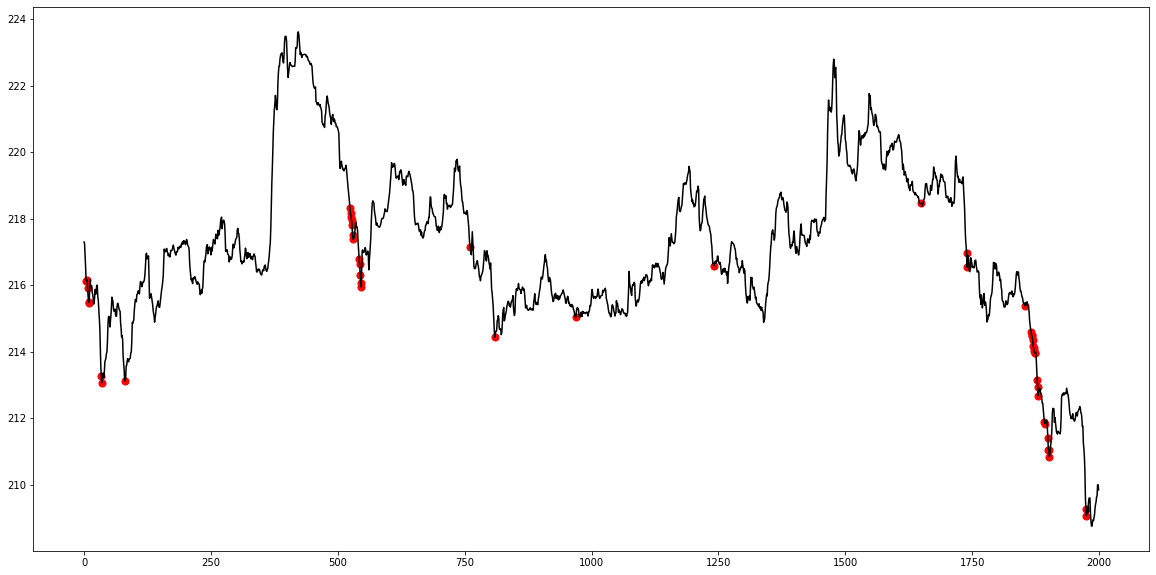

In [69]:
nu.graphPoints(smaller_view_data, mode="buy", plot_optimal=True)

In [25]:
# model_version = nu.exportModel(model, model_name, new_version=False, indicators=indicators, features=features, proba_threshold=0.75, is_nn=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./v2/strategy/saved_models/simple_nn_test/1_0/assets


In [26]:
# score, trades = nu.testModel(model_name, num_processes=4)

Importing Strategies...
Generating Model Data...
Preprocessing Model Predictions...
0it [00:00, ?it/s]Generating Algo Data...
Executing Strategy...
105553it [00:00, 142366.77it/s]
Generating Report...


TypeError: cannot unpack non-iterable NoneType object